<a href="https://colab.research.google.com/github/vt-ai-ml-club/repo/blob/master/Fall2020/ConvolutionalNeuralNetwork/ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference: https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

We will be classifying the [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10) dataset (popular dataset) with 10 image classes. This dataset is widely accessible and each image is preprocessed to be 32x32 which allows you to simply load & train.

The best model so far has a 99% accuracy.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


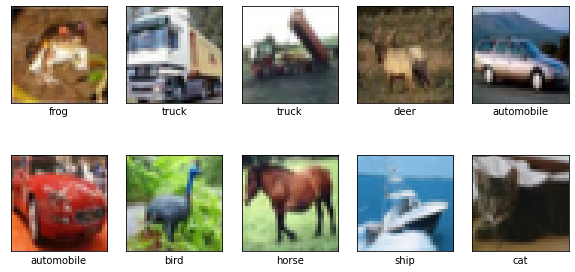

In [77]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    # plot styling; not super important
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

## Design model architecture

<img src="https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg" height=200/>

Step 1. Create the feature learning layers


In [ ]:
FILTER_SIZE = (3, 3)
POOL_SIZE = (2, 2)

model = models.Sequential()
model.add(layers.Conv2D(32, FILTER_SIZE, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(POOL_SIZE))
model.add(layers.Conv2D(64, FILTER_SIZE, activation='relu'))
model.add(layers.MaxPooling2D(POOL_SIZE))
model.add(layers.Conv2D(64, FILTER_SIZE, activation='relu'))

Step 2. Add the classification layer

In [ ]:
NUM_CLASSES = 10
NUM_NEURONS = 64

model.add(layers.Flatten())
model.add(layers.Dense(NUM_NEURONS, activation='relu'))
model.add(layers.Dense(NUM_CLASSES))

model.summary()

## Train the model

Find the optimal weights to classify the images. 

NOTE: weights include filters and perceptron weights

In [ ]:
model.compile(optimizer='ADAM',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5138 - accuracy: 0.4495 - val_loss: 1.2524 - val_accuracy: 0.5523
Epoch 2/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1595 - accuracy: 0.5884 - val_loss: 1.0828 - val_accuracy: 0.6195
Epoch 3/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0212 - accuracy: 0.6404 - val_loss: 1.0906 - val_accuracy: 0.6268
Epoch 4/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9278 - accuracy: 0.6766 - val_loss: 1.0014 - val_accuracy: 0.6587
Epoch 5/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8560 - accuracy: 0.7004 - val_loss: 0.9474 - val_accuracy: 0.6705
Epoch 6/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7959 - accuracy: 0.7213 - val_loss: 0.8894 - val_accuracy: 0.6958
Epoch 7/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7507 - accuracy: 0.7392 - val_loss: 0.8939 -

## Plot the model's performance

A dataset is generally partitioned into two parts: *training set* (for training the model) and *validation set* (evaluating the model).

* "accuracy" is the % of data points correctly classified on the *training set*.

* "val_accuracy" is the % of data points correctly classified on the *validation set*.

313/313 - 3s - loss: 0.9623 - accuracy: 0.7052


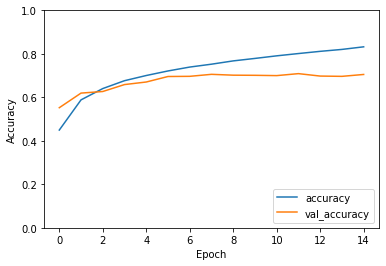

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Test our model on non-CIFAR-10 images

In [74]:
from PIL import Image       # Image objects
import requests             # HTTP requests
from io import BytesIO      # Byte streams
import numpy as np          # Matrix operations, numpy arrays are common input types

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])   # add a SoftMax layer ontop of our CNN

def classify_online_image(img_url):
  'Retrieve image'
  response = requests.get(img_url)                  # request the image from url
  img = Image.open(BytesIO(response.content))       # convert bytes to image (that we can see)

  'Preprocess image for TensorFlow'
  img = img.resize((32, 32))
  data = np.array(img)                              # convert image (we can see) to image (computer can see)
  data = data.reshape(1, 32, 32, 3)                 # model needs a 4D matrix (one dimension is the images, remaining 3 dimensions are the pixel matrix)

  'Make a prediction'
  probabilities = probability_model.predict(data)
  class_idx = np.argmax(probabilities)
  print(class_names[class_idx])

horse


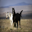

In [76]:
classify_online_image("https://i1.wp.com/www.denverpost.com/wp-content/uploads/2017/10/5203536.jpg?w=620&crop=0%2C0px%2C100%2C9999px")
img